# **Import Libraries and modules**

In [0]:
# https://keras.io/
!pip install -q keras
import keras

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


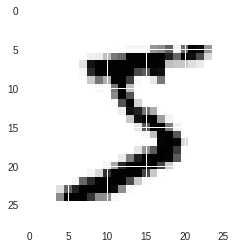

In [151]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [154]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [156]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [182]:
from keras.layers import Activation
model = Sequential()

 
model = Sequential()
model.add(Convolution2D(32, (3, 3), input_shape=(28,28,1)))
model.add(Convolution2D(10, 1, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), dim_ordering="th"))
model.add(Convolution2D(10, 13))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(1))
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D(pool_size=(2, 2), data_format="channels_first")`
  


In [183]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_104 (Conv2D)          (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_105 (Conv2D)          (None, 26, 26, 10)        330       
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 26, 13, 5)         0         
_________________________________________________________________
conv2d_106 (Conv2D)          (None, 14, 1, 10)         8460      
_________________________________________________________________
flatten_12 (Flatten)         (None, 140)               0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 140)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 141       
__________

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [124]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

/usr/local/lib/python3.6/dist-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/10
60000/60000 [==============================] - 17s 285us/step - loss: 0.1979 - acc: 0.9431
Epoch 2/10
60000/60000 [==============================] - 17s 282us/step - loss: 0.0708 - acc: 0.9790
Epoch 3/10
 4480/60000 [=>............................] - ETA: 15s - loss: 0.0565 - acc: 0.9844

60000/60000 [==============================] - 17s 283us/step - loss: 0.0522 - acc: 0.9840
Epoch 4/10
60000/60000 [==============================] - 17s 289us/step - loss: 0.0403 - acc: 0.9877
Epoch 5/10
 9856/60000 [===>..........................] - ETA: 14s - loss: 0.0279 - acc: 0.9911

60000/60000 [==============================] - 17s 286us/step - loss: 0.0330 - acc: 0.9892
Epoch 6/10
60000/60000 [==============================] - 17s 288us/step - loss: 0.0251 - acc: 0.9917
Epoch 7/10
11488/60000 [====>.........................] - ETA: 13s - loss: 0.0154 - acc: 0.9950

60000/60000 [==============================] - 17s 288us/step - loss: 0.0202 - acc: 0.9937
Epoch 8/10
60000/60000 [==============================] - 17s 286us/step - loss: 0.0166 - acc: 0.9947
Epoch 9/10
12064/60000 [=====>........................] - ETA: 13s - loss: 0.0115 - acc: 0.9973

60000/60000 [==============================] - 17s 288us/step - loss: 0.0136 - acc: 0.9955
Epoch 10/10
60000/60000 [==============================] - 17s 284us/step - loss: 0.0109 - acc: 0.9964


In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [73]:
print(score)

[0.07850057601239896, 0.9824]


In [0]:
y_pred = model.predict(X_test)

In [75]:
print(y_pred[:9])
print(y_test[:9])

[[2.2419364e-20 2.8697172e-17 9.8720518e-14 3.1340381e-08 2.3875839e-21
  3.4547195e-17 2.3132124e-32 1.0000000e+00 2.8607945e-12 1.0654361e-09]
 [2.2957149e-13 8.2925533e-12 1.0000000e+00 9.5004766e-13 2.1587979e-20
  2.1855654e-17 2.6543676e-10 2.7944845e-25 8.2160353e-13 5.9700274e-21]
 [4.5445295e-10 9.9994469e-01 9.1749343e-06 4.4636658e-10 4.2690914e-05
  3.3093858e-10 4.1329216e-09 3.3026490e-06 1.5847377e-07 7.6383951e-12]
 [1.0000000e+00 1.8095359e-16 3.7709732e-08 7.2904214e-14 2.0191176e-13
  2.9776279e-12 1.5961550e-08 6.6019148e-11 5.1007735e-12 6.1443167e-10]
 [1.3433245e-14 5.4771599e-18 1.3482013e-14 7.1074237e-11 1.0000000e+00
  6.7115465e-19 2.7702869e-16 2.4867912e-12 7.4747736e-11 5.2611018e-09]
 [1.2841712e-11 9.9986744e-01 1.0292445e-07 2.1165632e-10 5.7071129e-06
  6.2831596e-14 5.6403853e-12 1.2643581e-04 2.3962806e-07 6.6906321e-11]
 [2.4610916e-19 4.5767838e-12 6.4922460e-07 3.8202573e-11 9.9970526e-01
  2.2262101e-09 2.5865423e-19 1.3225689e-08 2.8978373e-04 

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [79]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_14'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()

KeyError: ignored